<a href="https://colab.research.google.com/github/swimbeginner/TensorFlow2/blob/main/NeuralNet_12262020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##google tensorflow with 
[handwriting case](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/multi-class_classification_with_MNIST.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=multiclass_tf2-colab&hl=en#scrollTo=nj3v5EKQFY8s)

In [18]:
%tensorflow_version 2.x

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format

np.set_printoptions(linewidth=200)

In [20]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [21]:
print(x_train.shape)
print(x_train[1000])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255 251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232 254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33 200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

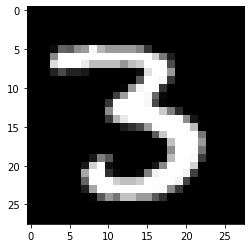

In [22]:
plt.imshow(x_train[12],cmap='gray', vmin=0, vmax=255)

In [23]:
x_train_normalized = x_train/255.0
x_test_normalized  = x_test/255.0
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [24]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  for m in list_of_metrics:
    x=hist[m]
    plt.plot(epochs[1:],x[1:],label=m)
  plt.legend()
print("load the plot_curve functions.")

load the plot_curve functions.


In [25]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=250, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch

  hist = pd.DataFrame(history.history)
  import pdb 
  pdb.set_trace()
  return epochs, hist   

print("load the all functions.") 

load the all functions.


Epoch 1/50
12/12 [==============================] - 2s 107ms/step - loss: 1.4609 - accuracy: 0.5490 - val_loss: 0.3746 - val_accuracy: 0.8898
Epoch 2/50
12/12 [==============================] - 1s 92ms/step - loss: 0.4116 - accuracy: 0.8772 - val_loss: 0.2788 - val_accuracy: 0.9218
Epoch 3/50
12/12 [==============================] - 1s 88ms/step - loss: 0.3058 - accuracy: 0.9101 - val_loss: 0.2305 - val_accuracy: 0.9349
Epoch 4/50
12/12 [==============================] - 1s 90ms/step - loss: 0.2509 - accuracy: 0.9265 - val_loss: 0.2007 - val_accuracy: 0.9438
Epoch 5/50
12/12 [==============================] - 1s 90ms/step - loss: 0.2162 - accuracy: 0.9382 - val_loss: 0.1793 - val_accuracy: 0.9503
Epoch 6/50
12/12 [==============================] - 1s 91ms/step - loss: 0.1854 - accuracy: 0.9472 - val_loss: 0.1614 - val_accuracy: 0.9542
Epoch 7/50
12/12 [==============================] - 1s 100ms/step - loss: 0.1674 - accuracy: 0.9508 - val_loss: 0.1478 - val_accuracy: 0.9592
Epoch 8/50


[0.06504462659358978, 0.9810000061988831]

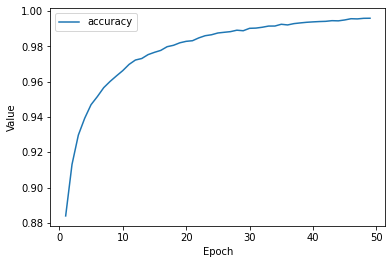

In [26]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

#@title Double-click to view some possible answers.

It would take much too long to experiment 
 fully with topography and dropout regularization 
 rate. In the real world, you would
 also experiment with learning rate, batch size, 
 and number of epochs.  Since you only have a 
 few minutes, searching for trends can be helpful.
 Here is what we discovered:
   * Adding more nodes (at least until 256 nodes) 
     to the first hidden layer improved accuracy.
   * Adding a second hidden layer generally 
     improved accuracy.
   * When the model contains a lot of nodes, 
     the model overfits unless the dropout rate 
     is at least 0.5. 

 We reached 98% test accuracy with the 
 following configuration:
   * One hidden layer of 256 nodes; no second 
      hidden layer.
   * dropout regularization rate of 0.4
 We reached 98.2% test accuracy with the 
 following configuration:
   * First hidden layer of 256 nodes; 
     second hidden layer of 128 nodes.
   * dropout regularization rate of 0.2